# Proyecto 1 - Parte final (Core)

Previo a cualquier cosa, cargamos el dataset. Como no hubo ninguna limpieza de datos ya que todo estaba bien, se carga el dataset original.

In [39]:
import pandas as pd


camino_ds = "../data/retail_sales_dataset.csv"
df = pd.read_csv(camino_ds, delimiter=",")

## Parte 2: Código de Parte 2 resumido.

In [40]:
from eda_utils import (
    obtener_columnas_numericas_df,
    obtener_columnas_categoricas_df,
)

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

columnas_numericas = obtener_columnas_numericas_df(df)
columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_numericas_prediccion = [
    "Age",
    # "Quantity",
    "Price per Unit",
    # "Total Amount",

]

columnas_categoricas_prediccion = [
    "Gender",
    "Product Category",
]

campo_salida = "Quantity"


X = df[[*columnas_numericas_prediccion] + [*columnas_categoricas_prediccion]]
y = df[campo_salida]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
    stratify=df[[*columnas_categoricas_prediccion]]
)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas_prediccion),
        ("cat", categorical_transformer, columnas_categoricas_prediccion),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas_prediccion),
        ("cat", categorical_transformer, columnas_categoricas_prediccion),
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

## Parte 3: Benchmarking de Técnicas de Machine Learning

### 1. Selección de Modelos:

* Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).
* Utilizar validación cruzada para evaluar el rendimiento de los modelos.

Se realizarán ambos ítems en un solo paso.

#### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            KNeighborsClassifier(),
            param_grid={
                "n_neighbors": list(range(1, 100)),
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

pipeline_knn.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Product Category'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20, 21, 22, 23,
                                                          24, 25, 26, 27, 28,
                                                          29, 30, ...]},
                              verbose=2))])

#### Random Forests

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            RandomForestClassifier(),
            param_grid={ 
                'n_estimators': list(range(1, 21)),
                'max_depth': list(range(1, 10)),
                'random_state': [0,]
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

pipeline_rf.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=1, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=2, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=3, random_state=0; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=3, 

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Product Category'])])),
                ('model',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                          'n_estimators': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20],
                                          'random_state': [0]},
                              verbose=2))])

#### Regresión Logística

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


pipeline_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', GridSearchCV(
            LogisticRegression(penalty='l2', random_state=0),
            param_grid={
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            },
            cv=5,
            refit=True,
            verbose=2,
        )),
    ]
)

pipeline_lr.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Price per Unit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Product Category'])])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000]},
                              verbose=2))])

#### LGBM

In [44]:
import lightgbm as lgb

modelo_lgb = lgb.LGBMClassifier(random_state=0)


# No se necesitan transformaciones de columnas categoricas ya que el modelo LGBM los maneja por defecto
preprocessor_lgb = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas_prediccion),
    ]
)

pipeline_lgbm = Pipeline(
    steps=[
        ('preprocessor', preprocessor_lgb),
        ('model', lgb.LGBMClassifier(random_state=0)),
    ]
)

pipeline_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 2
[LightGBM] [Info] Start training from score -1.358123
[LightGBM] [Info] Start training from score -1.369297
[LightGBM] [Info] Start training from score -1.494835
[LightGBM] [Info] Start training from score -1.330725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Price per Unit'])])),
                ('model', LGBMClassifier(random_state=0))])

### 1. Selección de Modelos:

* Comparación de Modelos:

Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC. Seleccionar el mejor modelo basado en las métricas obtenidas.


Importamos las librerías para benchmarking

In [45]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

from classification_utils import graficar_matriz_confusion

#### KNN

In [46]:
# Realizar predicciones
y_pred_knn = pipeline_knn.predict(X_test)

# Evaluar el modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'Exactitud:accuracy_knn {accuracy_knn}')
classification_report_knn = classification_report(y_test, y_pred_knn)
print('Informe de Clasificación:')
print(classification_report_knn)

# Matriz de Confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print('Matriz de Confusión KNN:')
print(conf_matrix_knn)

Exactitud:accuracy_knn 0.25
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.26      0.47      0.34        73
           2       0.20      0.18      0.19        65
           3       0.30      0.18      0.22        84
           4       0.23      0.18      0.20        78

    accuracy                           0.25       300
   macro avg       0.25      0.25      0.24       300
weighted avg       0.25      0.25      0.24       300

Matriz de Confusión KNN:
[[34 16 14  9]
 [26 12  8 19]
 [32 17 15 20]
 [37 14 13 14]]


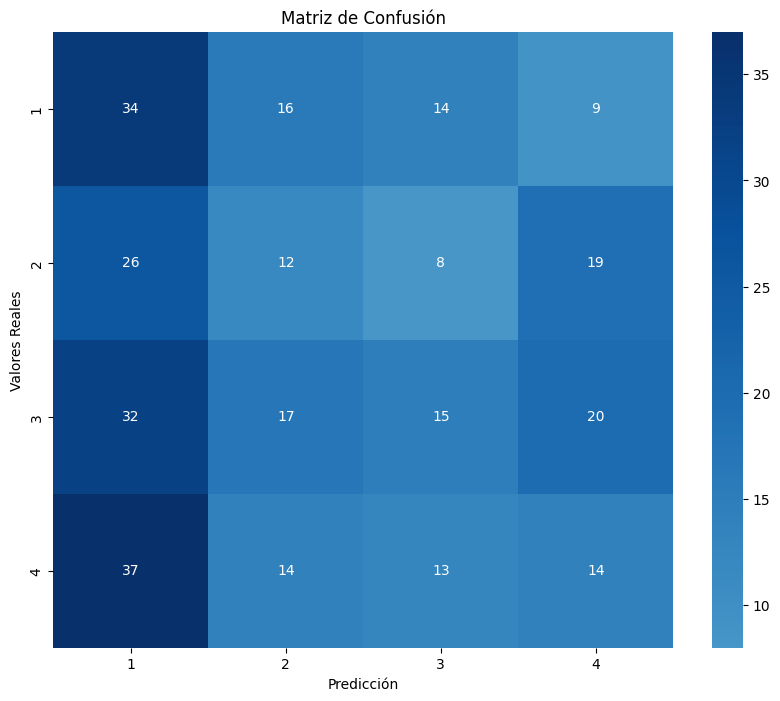

In [47]:
graficar_matriz_confusion(conf_matrix_knn, labels=["1", "2", "3", "4"])

#### Random Forests

In [48]:
# Realizar predicciones
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Exactitud: {accuracy_rf}')
classification_report_rf = classification_report(y_test, y_pred_rf)
print('Informe de Clasificación:')
print(classification_report_rf)

# Matriz de Confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Matriz de Confusión Random Forests:')
print(conf_matrix_rf)

Exactitud: 0.2633333333333333
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.36      0.32      0.34        73
           2       0.21      0.23      0.22        65
           3       0.25      0.06      0.10        84
           4       0.25      0.46      0.33        78

    accuracy                           0.26       300
   macro avg       0.27      0.27      0.24       300
weighted avg       0.27      0.26      0.24       300

Matriz de Confusión Random Forests:
[[23 10  5 35]
 [12 15  3 35]
 [16 26  5 37]
 [13 22  7 36]]


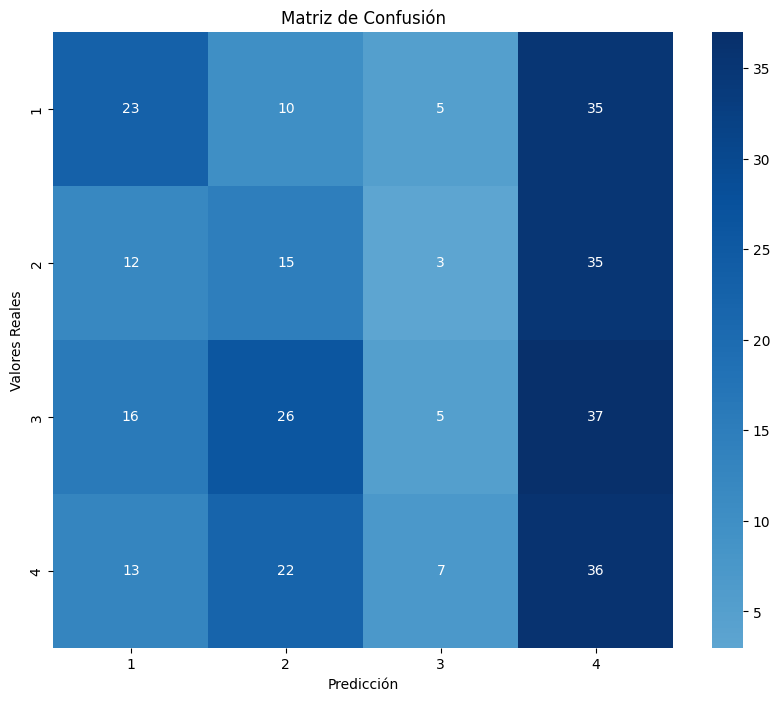

In [49]:
graficar_matriz_confusion(conf_matrix_rf, labels=["1", "2", "3", "4"])

#### Regresión Logística

In [50]:
# Realizar predicciones
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluar el modelo
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f'Exactitud: {accuracy_lr}')
classification_report_lr = classification_report(y_test, y_pred_lr)
print('Informe de Clasificación:')
print(classification_report_lr)

# Matriz de Confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print('Matriz de Confusión Regresión Logística:')
print(conf_matrix_lr)

Exactitud: 0.24666666666666667
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.11      0.01      0.02        73
           2       0.00      0.00      0.00        65
           3       0.00      0.00      0.00        84
           4       0.25      0.94      0.40        78

    accuracy                           0.25       300
   macro avg       0.09      0.24      0.11       300
weighted avg       0.09      0.25      0.11       300

Matriz de Confusión Regresión Logística:
[[ 1  0  0 72]
 [ 0  0  0 65]
 [ 3  0  0 81]
 [ 5  0  0 73]]


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

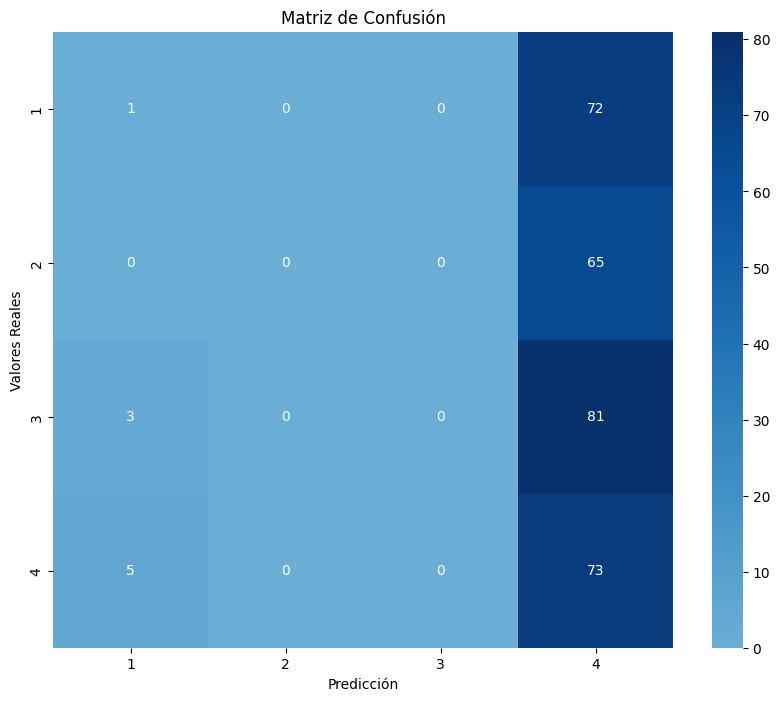

In [51]:
graficar_matriz_confusion(conf_matrix_lr, labels=["1", "2", "3", "4"])

#### LGBM

In [52]:
# Realizar predicciones
y_pred_lgbm = pipeline_lgbm.predict(X_test)

# Evaluar el modelo
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

print(f'Exactitud: {accuracy_lgbm}')
classification_report_lgbm = classification_report(y_test, y_pred_lgbm)
print('Informe de Clasificación:')
print(classification_report_lgbm)

# Matriz de Confusión
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print('Matriz de Confusión LGBM:')
print(conf_matrix_lgbm)

Exactitud: 0.22
Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.22      0.22      0.22        73
           2       0.19      0.23      0.21        65
           3       0.26      0.23      0.24        84
           4       0.21      0.21      0.21        78

    accuracy                           0.22       300
   macro avg       0.22      0.22      0.22       300
weighted avg       0.22      0.22      0.22       300

Matriz de Confusión LGBM:
[[16 18 19 20]
 [17 15 10 23]
 [22 26 19 17]
 [19 18 25 16]]


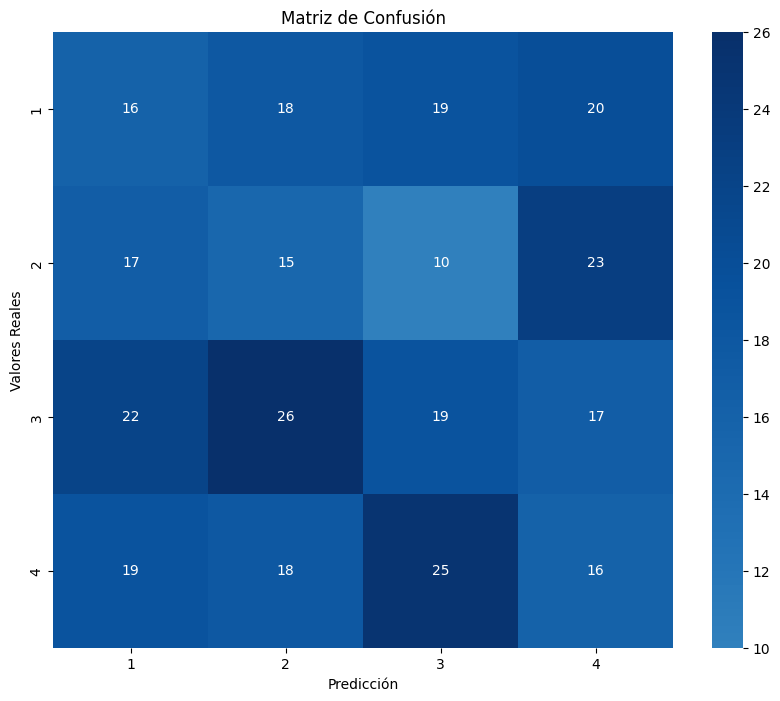

In [53]:
graficar_matriz_confusion(conf_matrix_lgbm, labels=["1", "2", "3", "4"])

* Seleccionar el mejor modelo basado en las métricas obtenidas.

De entre todos los modelos el que tiene scores mejores distribuidos para cada cantidad son los KNN.

## Parte 4: Análisis de Métricas

### 1. Informe de Clasificación:

* Generar un informe de clasificación para los modelos evaluados.

In [54]:
camino_reporte = "../reports/classification_report.txt"


with open(camino_reporte, "w") as f:
    f.write("Reporte de Clasificación KNN:\n\n")
    f.write(str(classification_report_knn))

    f.write("\n\n")

    f.write("Reporte de Clasificación Random Forests:\n\n")
    f.write(str(classification_report_rf))

    f.write("\n\n")

    f.write("Reporte de Clasificación Regresión Logística:\n\n")
    f.write(str(classification_report_lr))

    f.write("\n\n")

    f.write("Reporte de Clasificación LGBM:\n\n")
    f.write(str(classification_report_lgbm))

* Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.

Se guardará la matriz de confusión para el modelo KNN.

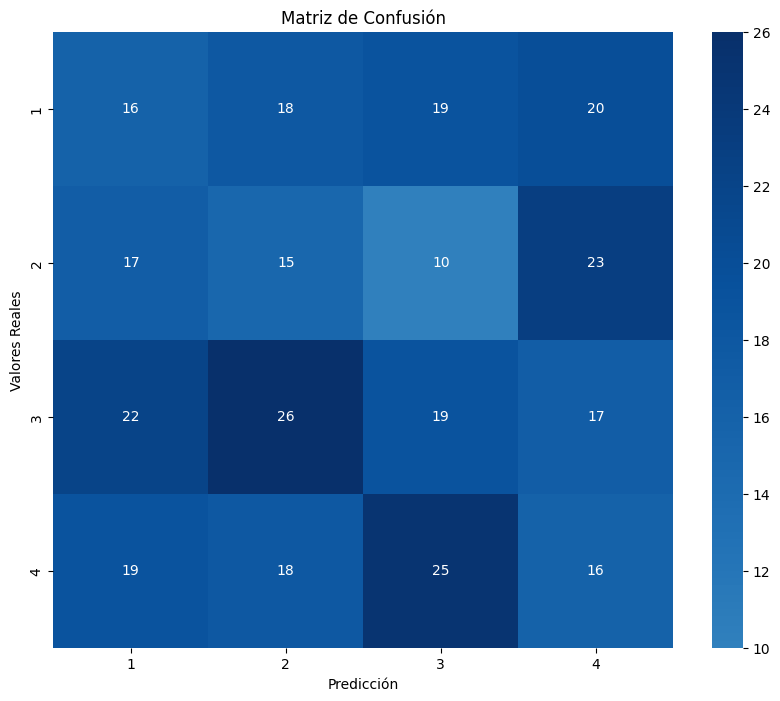

In [55]:
from classification_utils import guardar_matriz_confusion


camino_matriz_confusion = "../reports/confusion_matrix.png"
guardar_matriz_confusion(conf_matrix_lgbm, camino_matriz_confusion, labels=["1", "2", "3", "4"])

### 2. Curva ROC y AUC:

* Crear y visualizar la curva ROC para los modelos de clasificación binaria.
* Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer


fpr = dict()
tpr = dict()
roc_auc = dict()

binarizer = LabelBinarizer()

y_test_binarized = binarizer.fit_transform(y_test)
y_pred_knn_binarized = binarizer.transform(y_pred_knn)

classes = binarizer.classes_
n_classes = len(classes)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_knn_binarized.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_knn_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.50
Macro-averaged One-vs-Rest ROC AUC score:
0.50


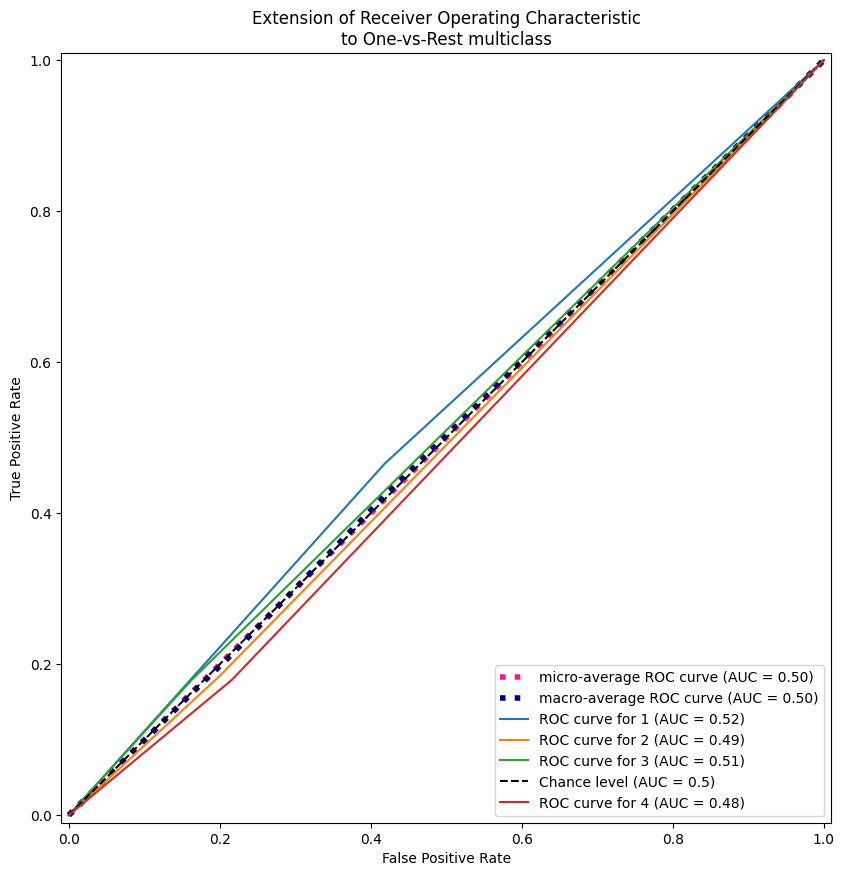

In [57]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

for class_id in range(0, n_classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, class_id],
        y_pred_knn_binarized[:, class_id],
        name=f"ROC curve for {classes[class_id]}",
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

camino_salida_curva_ruc_aoc = "../reports/roc_curve"
plt.savefig(camino_salida_curva_ruc_aoc, dpi='figure', format=None)
plt.show()

Como se puede ver, los resultados de este método de igual manera no son muy buenos, ya que las curvas deben tender más a subir a la izquierda.